<a href="https://colab.research.google.com/github/lakhahqh/TrafficCollisionAnalysis/blob/dev/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thông tin nhóm

18120379 Võ Thị Hiếu \\
18120408 Trần Ngọc Lan Khanh \\
18120434 Thái Hoàng Lâm \\
18120462 Nguyễn Thị Mận \\
1712648 Nguyễn Thị Kiều Oanh 


# Đọc và xử lí dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn

In [ ]:
!pip install geopandas
!pip install descartes 

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 34.2 MB/s 
     |████████████████████████████████| 6.3 MB 17.0 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Chúng em để cả 2 cách đọc file ở đây ạ: 
# 1. Tải thư mục data lên drive và đọc:

path = "/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-"
cb_shapefile = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/Cambridgeshire.zip')

# 2. Tạo thư mục data và tải file lên (cùng cấp với file .ipynb)

#path =  'data/road_traffic_collisions/road-traffic-collisions-'
#cb_shapefile = gpd.read_file('data/road_traffic_collisions/Cambridgeshire.zip')

In [ ]:
data = 5*[None]
times = ["2012-5","2013-6", "2014-3", "2015-4", "2016-2"]
for i in range(5):
    i_path = path+times[i]+".xls"
    print(i_path)
    data[i] = pd.read_excel(i_path)

/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-2012-5.xls
/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-2013-6.xls
/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-2014-3.xls
/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-2015-4.xls
/content/drive/MyDrive/Colab Notebooks/data/road_traffic_collisions/road-traffic-collisions-2016-2.xls


In [ ]:
df = data[0]

for i in range(1, len(data)):
    df = pd.concat([df, data[i]])

df.head()    

,Reference,Date,Year,Month,Day,Day.1,Time,Severity,Road_Class,Main_rd_no,Junction Detail,Light,Weather,Surface,Speed_limit,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Unnamed: 25,Pedestrian-1_Sex,Pedestrian_1_Age,Pedestrian_1_Severity,Pedestria_1_Location,Pedestrian-1_Movement,Pedestrian_1_Mov_To,Location,Number_Vehicles,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding,Easting,Northing
0,2412,20120103,2012,1,3,Tuesday,1140,Slight,A,1198,'T'/staggered junctn,Day,Raining & windy,Wet/damp,60,N,N,N,N,N,Y,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A1198 JUNCTION LONDON RD GODMANCHESTER,2,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,NaN,NaN,NaN,NaN,NaN,NaN,525250.3192,269592.7491
1,2612,20120103,2012,1,3,Tuesday,1244,Slight,A,505,Not at junction,Day,Fine (no wind),Wet/damp,50,N,N,N,N,N,N,Y,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A505 50M EAST OF M11 AT LAYBY,2,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,546715.1485,246747.0387
2,2712,20120103,2012,1,3,Tuesday,1317,Serious,A,1,Not at junction,Day,Fine & windy,Wet/damp,70,N,N,Y,N,N,Y,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A1 NORTHBOUND SOUTHOE 50M NORTH BELL LANE,1,Car,Going ahead right hand bend,SE,N,"Not at,or within 20m of, junction",Skidded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518665.2610,264848.0873
3,2912,20121221,2012,12,21,Friday,15,Serious,U,0,'T'/staggered junctn,Dark,Fine (no wind),Dry,30,Y,N,N,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,PARK RD JUNCTION PRINCES ST PETERBOROUGH,2,Car,Moving off,NW,SE,Entering main road,Did not skid,Pedal cycle,Going ahead,S,N,Mid jnctn - on rbout or main road,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,519514.8238,299836.2220
4,3112,20120103,2012,1,3,Tuesday,1745,Slight,U,0,Not at junction,Dark,Fine & windy,Dry,30,Y,N,N,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,BADGENEY RD 50M EAST OF ELWYN RD MARCH,1,Pedal cycle,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542037.4532,296531.1881


Đặt lại địa chỉ index

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.tail()

,Reference,Date,Year,Month,Day,Day.1,Time,Severity,Road_Class,Main_rd_no,Junction Detail,Light,Weather,Surface,Speed_limit,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Unnamed: 25,Pedestrian-1_Sex,Pedestrian_1_Age,Pedestrian_1_Severity,Pedestria_1_Location,Pedestrian-1_Movement,Pedestrian_1_Mov_To,Location,Number_Vehicles,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding,Easting,Northing
10522,17229116,20161221,2016,12,21,Wednesday,1803,Slight,B,1040,Not at junction,Day,Fine (no wind),Dry,60,N,N,Y,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,OUTSIDE NUMBER 100 RAMSEY ROAD B1040,1,Car,Going ahead,S,N,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526445.0038,294738.0014
10523,17491416,20160801,2016,8,1,Monday,1135,Slight,A,14,Roundabout,Day,Fine (no wind),Dry,60,N,N,N,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,SPITTALS INTERCHANGE A14,2,Car,Slow or stopping,SW,NE,Entering roundabout,Did not skid,GV - unknown weight,Waiting to go ahd but held up,SW,NE,Entering roundabout,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,522224.0025,272793.0031
10524,17896816,20160625,2016,6,25,Saturday,1751,Slight,U,0,'T'/staggered junctn,Dark,Rain (no wind),Wet/damp,30,N,N,Y,Y,Y,N,N,N,N,N,1,Male,16,Slight,Unknown,Not known,Unknown,EMMANUEL ROAD UNSPECIFIED ROAD OR LOCATION EARL STREET,1,Car,Going ahead,N,S,Entering main road,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545401.9988,258510.0015
10525,18403516,20161229,2016,12,29,Thursday,2100,Serious,U,0,'T'/staggered junctn,Dark,Unknown,Dry,30,N,N,N,N,Y,N,N,N,N,N,1,Male,50,Serious,On footway/verge,Not known,Towards E,DENMARK ROAD AT JN WITH ROOKS STREET,1,NaN,Going ahead,NE,E,Mid jnctn - on rbout or main road,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545369.9997,267550.0039
10526,20172116,20161011,2016,10,11,Tuesday,1515,Slight,U,0,'T'/staggered junctn,Day,Fine (no wind),Dry,30,N,N,N,N,Y,N,N,N,N,N,1,Female,33,Slight,On footway/verge,Not known,Standing still,WHYTEFIELD ROAD AT JN WITH STATION ROAD,1,Car,Going ahead,NE,SW,Approaching jnctn or waiting/parked,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528571.9987,285168.0008


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference                 10527 non-null  int64  
 1   Date                      10527 non-null  int64  
 2   Year                      10527 non-null  int64  
 3   Month                     10527 non-null  int64  
 4   Day                       10527 non-null  int64  
 5   Day.1                     10527 non-null  object 
 6   Time                      10527 non-null  int64  
 7   Severity                  10527 non-null  object 
 8   Road_Class                10527 non-null  object 
 9   Main_rd_no                10527 non-null  int64  
 10  Junction Detail           10527 non-null  object 
 11  Light                     10527 non-null  object 
 12  Weather                   10527 non-null  object 
 13  Surface                   10527 non-null  object 
 14  Speed_

In [ ]:
df.shape

(10527, 54)

- Tập dữ liệu đọc vào  ban đầu có 10527 mẫu với cộng 54 thuộc tính 

In [ ]:
df.index.duplicated().sum()

0

- Không có mẫu bị trùng

### Số lượng phần tử bị thiếu ở mỗi thuộc tính

In [ ]:
df.isna().sum()

Reference                      0
Date                           0
Year                           0
Month                          0
Day                            0
Day.1                          0
Time                           0
Severity                       0
Road_Class                     0
Main_rd_no                     0
Junction Detail                0
Light                          0
Weather                        0
Surface                        0
Speed_limit                    0
Cycle                          0
TWMV                           0
Child                          0
Child_Pedestrian               0
Ped                            0
Skid                           0
HGV                            0
LGV                            0
PSV                            0
School Journey                 0
Unnamed: 25                    0
Pedestrian-1_Sex            9565
Pedestrian_1_Age               0
Pedestrian_1_Severity       9565
Pedestria_1_Location        9570
Pedestrian

**Chuyển dữ liệu thuộc tính "Time" về dạng chuẩn**

In [ ]:
def convert_time(Sr):
    Sr=Sr.map('{:04}'.format)
    Sr =Sr.map(lambda x: datetime.strptime(str(x), '%H%M').time())
    return Sr

df["Time"] = convert_time(df["Time"])

In [ ]:
df["Time"]

0        11:40:00
1        12:44:00
2        13:17:00
3        00:15:00
4        17:45:00
           ...   
10522    18:03:00
10523    11:35:00
10524    17:51:00
10525    21:00:00
10526    15:15:00
Name: Time, Length: 10527, dtype: object

###Một số tính chất của dữ liệu kiểu số

In [ ]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
des = df._get_numeric_data().describe()
missing_inf = pd.DataFrame(df[df._get_numeric_data().columns].apply(missing_ratio), columns=["missing_ratio"]).T
des = pd.concat([des, missing_inf])
des

,Reference,Date,Year,Month,Day,Main_rd_no,Speed_limit,Unnamed: 25,Pedestrian_1_Age,Number_Vehicles,Easting,Northing
count,1.052700e+04,1.052700e+04,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000
mean,2.201518e+06,2.014023e+07,2013.953738,6.811342,15.677306,455.269877,43.893797,0.094329,2.910991,1.884677,533811.386977,278329.104309
std,3.978220e+06,1.438720e+04,1.438738,3.466861,8.683451,516.606169,16.218315,0.303149,11.412563,0.697162,14429.446087,19615.209907
min,1.120000e+02,2.012010e+07,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,502042.269600,236372.418400
25%,8.801250e+04,2.013030e+07,2013.000000,4.000000,8.000000,10.000000,30.000000,0.000000,0.000000,1.000000,519381.447550,259546.035000
50%,2.062120e+05,2.014060e+07,2014.000000,7.000000,16.000000,198.000000,30.000000,0.000000,0.000000,2.000000,535325.998200,274386.057100
75%,3.034363e+06,2.015101e+07,2015.000000,10.000000,23.000000,1086.000000,60.000000,0.000000,0.000000,2.000000,545938.810000,298627.463050
max,2.017212e+07,2.016123e+07,2016.000000,12.000000,31.000000,6118.000000,70.000000,3.000000,95.000000,9.000000,570844.979400,317908.508900
missing_ratio,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###Một số thuộc tính của dữ liệu kiểu phân loại

In [ ]:
cate_features = df.select_dtypes(include='object').columns.to_list()

In [ ]:
pd.set_option('display.max_colwidth', 200)
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
infor = df[cate_features].agg([missing_ratio, num_values, value_ratios])
infor.T

,missing_ratio,num_values,value_ratios
Day.1,0,7,"{'Friday': 17.0, 'Tuesday': 15.5, 'Wednesday': 15.5, 'Thursday': 15.5, 'Monday': 15.1, 'Saturday': 12.0, 'Sunday': 9.5}"
Time,0,1216,"{17:00:00: 1.1, 17:30:00: 1.0, 18:00:00: 1.0, 16:30:00: 0.9, 15:00:00: 0.9, 08:30:00: 0.9, 15:30:00: 0.9, 17:15:00: 0.9, 16:00:00: 0.9, 08:45:00: 0.8, 18:30:00: 0.8, 09:00:00: 0.8, 12:00:00: 0.7, ..."
Severity,0,3,"{'Slight': 83.6, 'Serious': 14.9, 'Fatal': 1.5}"
Road_Class,0,6,"{'A': 45.6, 'U': 20.1, 'C': 19.3, 'B': 13.5, 'M': 0.9, 'A(M)': 0.5}"
Junction Detail,0,9,"{'Not at junction': 44.1, ''T'/staggered junctn': 26.9, 'Roundabout': 13.2, 'Private drive/entry': 7.1, 'Cross roads': 4.8, 'Slip road': 1.7, 'Uncoded junction': 1.1, 'Mini-roundabout': 0.9, 'Junc..."
Light,0,2,"{'Day': 73.8, 'Dark': 26.2}"
Weather,0,9,"{'Fine (no wind)': 77.5, 'Rain (no wind)': 10.4, 'Unknown': 5.2, 'Uncoded': 2.8, 'Fine & windy': 1.6, 'Raining & windy': 1.0, 'Fog/mist': 1.0, 'Snow (no wind)': 0.4, 'Snowing & windy': 0.0}"
Surface,0,6,"{'Dry': 68.3, 'Wet/damp': 29.8, 'Frost/Ice': 1.5, 'Snow': 0.3, 'Unknown': 0.2, 'Flood >3cm': 0.1}"
Cycle,0,2,"{'N': 77.8, 'Y': 22.2}"
TWMV,0,2,"{'N': 88.2, 'Y': 11.8}"


- Chọn ra một số thuộc tính có tỉ lệ thiếu cao ( >90%) và xóa chúng.
- Ta cũng xóa luôn cột "Unnamed:25" và "Date"

In [ ]:
top_missing_features = infor.T[infor.T['missing_ratio'] >= 90].index.to_list()
top_missing_features

['Pedestrian-1_Sex',
 'Pedestrian_1_Severity',
 'Pedestria_1_Location',
 'Pedestrian-1_Movement',
 'Pedestrian_1_Mov_To']

In [ ]:
data = df.copy()
data.drop(columns=top_missing_features+["Date", "Unnamed: 25"],inplace=True)
# data.drop(columns=["Date"], inplace=True)

Sử dụng SimpleImputer để điền dữ liệu còn thiếu
- Vì chỉ có dữ liệu kiểu phân loại bị khuyết nên ta chỉ áp dụng SimpleImputer cho các thuộc tính này

In [ ]:
cate_features = data.select_dtypes(include='object').columns.to_list()
num_features = data.select_dtypes(exclude='object').columns.to_list()

In [ ]:
data[cate_features].head(2)

,Day.1,Time,Severity,Road_Class,Junction Detail,Light,Weather,Surface,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Location,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding
0,Tuesday,11:40:00,Slight,A,'T'/staggered junctn,Day,Raining & windy,Wet/damp,N,N,N,N,N,Y,N,N,N,N,A1198 JUNCTION LONDON RD GODMANCHESTER,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,12:44:00,Slight,A,Not at junction,Day,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A505 50M EAST OF M11 AT LAYBY,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# num_imputer = [('num', SimpleImputer(missing_values= np.nan, strategy='mean'))]
cate_imputer = [('cate', SimpleImputer(missing_values= np.nan, strategy='most_frequent'))]

In [ ]:
# tsf = ColumnTransformer([('num', Pipeline(num_imputer), num_features), ('cate', Pipeline(cate_imputer), cate_features)])
tsf = ColumnTransformer([('cate', Pipeline(cate_imputer), cate_features)])
cate_data = pd.DataFrame(tsf.fit_transform(data), columns = cate_features, index = data.index)

In [ ]:
data.drop(columns=cate_features, inplace=True)

In [ ]:
data =pd.concat([data, cate_data], axis=1)

Kiểm tra lại tập dữ liệu lần nữa

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference                 10527 non-null  int64  
 1   Year                      10527 non-null  int64  
 2   Month                     10527 non-null  int64  
 3   Day                       10527 non-null  int64  
 4   Main_rd_no                10527 non-null  int64  
 5   Speed_limit               10527 non-null  int64  
 6   Pedestrian_1_Age          10527 non-null  int64  
 7   Number_Vehicles           10527 non-null  int64  
 8   Easting                   10527 non-null  float64
 9   Northing                  10527 non-null  float64
 10  Day.1                     10527 non-null  object 
 11  Time                      10527 non-null  object 
 12  Severity                  10527 non-null  object 
 13  Road_Class                10527 non-null  object 
 14  Juncti

$\rightarrow$ Không còn dữ liệu bị khuyết

## Đất nước/khu vực nào xảy ra tai nạn giao thông thường xuyên nhất? Giải thích?

In [ ]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(data["Easting"], data["Northing"])]
geodata=gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:

cb_shapefile 

,objectid,lad14cd,lad14nm,lad14nmw,st_areasha,st_lengths,geometry
0,31,E06000031,Peterborough,None,3.434220e+08,111024.899258,"POLYGON ((531400.339 310256.656, 532300.656 309735.448, 532618.963 309516.145, 533179.270 309333.142, 533247.179 308908.937, 533756.944 305676.798, 534456.254 301913.683, 534699.554 301470.479, 53..."
1,61,E07000008,Cambridge,None,4.070520e+07,36894.977664,"POLYGON ((547270.438 262081.360, 548027.947 261772.856, 548098.551 261945.258, 548244.252 261889.958, 548291.351 261788.457, 548384.952 261737.357, 548380.850 261639.056, 548223.449 261700.356, 54..."
2,62,E07000009,East Cambridgeshire,None,6.513370e+08,231624.493957,"MULTIPOLYGON (((556808.727 293143.228, 557232.727 293053.831, 557349.125 293092.132, 557418.528 292970.732, 557436.034 292714.429, 557394.937 292618.328, 557436.939 292499.327, 557777.637 292517.4..."
3,63,E07000010,Fenland,None,5.464792e+08,186330.382189,"MULTIPOLYGON (((545926.773 311403.697, 545928.173 311293.494, 546093.971 311384.496, 546105.172 311293.194, 546244.670 311272.494, 546251.070 311298.395, 546284.170 311280.494, 546550.067 311408.6..."
4,65,E07000012,South Cambridgeshire,None,9.016969e+08,254496.416837,"POLYGON ((538910.891 274761.617, 539266.295 274657.813, 539353.895 274664.413, 539321.594 274712.114, 539449.496 274637.212, 539437.497 274609.812, 539701.003 274356.906, 540209.011 274012.599, 54..."


Text(512.5796610798046, 0.5, 'Northing')

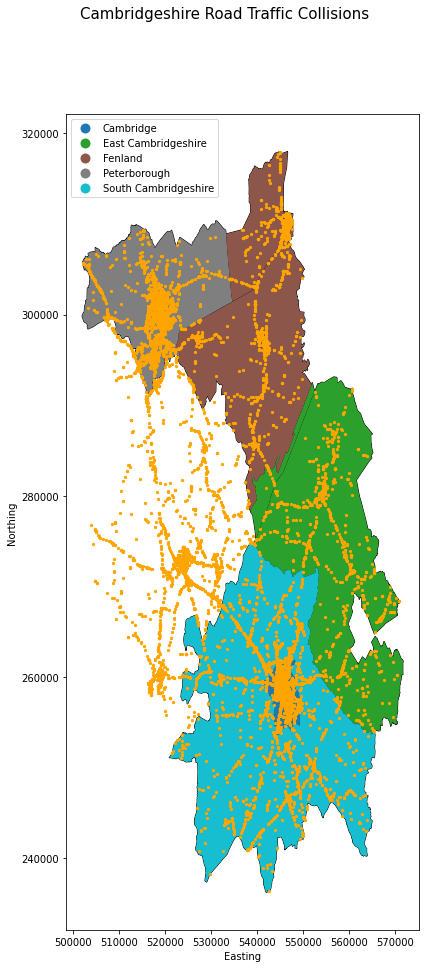

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
# cb_shapefile.plot()
cb_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=1,linewidth=1, cmap='cividis')
cb_shapefile.plot(column='lad14nm', ax=ax, legend=True)

geodata.plot(ax=ax,color='orange', markersize=5)
fig.suptitle('Cambridgeshire Road Traffic Collisions', fontsize =15)
ax.set_xlabel('Easting', fontsize = 10)
ax.set_ylabel('Northing', fontsize= 10)

- Trong tập dữ liệu có cả các vụ tai nạn giao thông tại Huntingdonshire nhưng do không tìm thấy shapefile của Cambridgeshire có chứa cả Huntingdonshire (Cambridgeshire chỉ có 5 quận, hạt Huntingdonshire nằm bên trong hạt Cambridgeshire nên có nơi gộp chung hạt này vào hạt Cambridgeshire, có nơi để hai hạt này phân biệt) nên tạm sử dụng shapefile này, những điểm màu cam nằm trên nền màu trắng là phần của Huntingdonshire.

- Quan sát sự phân bố của các vụ tai nạn trên bản đồ, ta có thể thấy hai quận có nhiều vụ tai nạn xảy ra nhất là Peterborough và Cambridge City

In [ ]:
# count the number of traffic collisions of each districts
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely.speedups
shapely.speedups.enable()

In [ ]:
keys = ['Peterborough', 'Cambridge', 'East Cambridgeshire', 'Fenland', 'South Cambridgeshire', 'Huntingdonshire']
# points_df = pd.DataFrame(columns=column_names)
point_dict = dict([(key, []) for key in keys])

for i in range(len(geometry)):
    for j, key in enumerate(keys):
        dis_poly = cb_shapefile.loc[cb_shapefile['lad14nm'] == key]
        if len(dis_poly) == 0 or geometry[i].within(dis_poly.loc[j, 'geometry']):
            point_dict[key].append(geometry[i])
            break


In [ ]:
# the number of accident in each district over 5 years
num_point = {}
for key in keys:
    num_point[key] = len(point_dict[key])
num_point

{'Cambridge': 1811,
 'East Cambridgeshire': 870,
 'Fenland': 1103,
 'Huntingdonshire': 1952,
 'Peterborough': 2908,
 'South Cambridgeshire': 1883}

<BarContainer object of 6 artists>

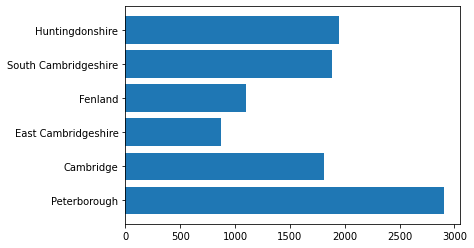

In [ ]:
names = list(num_point.keys())
values = list(num_point.values())
ticks=names
height= values
tick_label=list(names)
plt.barh(ticks,height)

- Quan sát biểu đồ, ta có thể thấy quận Peterborough là quận có nhiều vụ tai nạn giao thông xảy ra nhất
- Cambridge City có diện tích nhỏ nhất nhưng số vụ tai nạn xảy ra tại đây lại gần tương đương với hai nơi có diện tích lớn hơn rất nhiều là Huntingdonshire và South Cambridge, do đây là thành phố lớn, mật độ dân số cao và tập trung nhiều tuyến đường giao thông

## Xu hướng tăng hay giảm của số vụ tai nạn giao thông và dự đoán trong lương lai gần


In [ ]:
import warnings
import itertools
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from dateutil.parser import parse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Gom các cột Year, Month, Day thành một cột Date
df2 = data[["Year", "Month", "Day"]].copy()
df2.columns = ["Year", "Month", "Day"]
date_col = pd.to_datetime(df2)
pre_df = data.copy()
pre_df.insert(0, column='Date',value=date_col)
pre_df

,Date,Reference,Year,Month,Day,Main_rd_no,Speed_limit,Pedestrian_1_Age,Number_Vehicles,Easting,Northing,Day.1,Time,Severity,Road_Class,Junction Detail,Light,Weather,Surface,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Location,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding,geometry
0,2012-01-03,2412,2012,1,3,1198,60,0,2,525250.3192,269592.7491,Tuesday,11:40:00,Slight,A,'T'/staggered junctn,Day,Raining & windy,Wet/damp,N,N,N,N,N,Y,N,N,N,N,A1198 JUNCTION LONDON RD GODMANCHESTER,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (525250.319 269592.749)
1,2012-01-03,2612,2012,1,3,505,50,0,2,546715.1485,246747.0387,Tuesday,12:44:00,Slight,A,Not at junction,Day,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A505 50M EAST OF M11 AT LAYBY,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (546715.149 246747.039)
2,2012-01-03,2712,2012,1,3,1,70,0,1,518665.2610,264848.0873,Tuesday,13:17:00,Serious,A,Not at junction,Day,Fine & windy,Wet/damp,N,N,Y,N,N,Y,N,N,N,N,A1 NORTHBOUND SOUTHOE 50M NORTH BELL LANE,Car,Going ahead right hand bend,SE,N,"Not at,or within 20m of, junction",Skidded,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (518665.261 264848.087)
3,2012-12-21,2912,2012,12,21,0,30,0,2,519514.8238,299836.2220,Friday,00:15:00,Serious,U,'T'/staggered junctn,Dark,Fine (no wind),Dry,Y,N,N,N,N,N,N,N,N,N,PARK RD JUNCTION PRINCES ST PETERBOROUGH,Car,Moving off,NW,SE,Entering main road,Did not skid,Pedal cycle,Going ahead,S,N,Mid jnctn - on rbout or main road,Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (519514.824 299836.222)
4,2012-01-03,3112,2012,1,3,0,30,0,1,542037.4532,296531.1881,Tuesday,17:45:00,Slight,U,Not at junction,Dark,Fine & windy,Dry,Y,N,N,N,N,N,N,N,N,N,BADGENEY RD 50M EAST OF ELWYN RD MARCH,Pedal cycle,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (542037.453 296531.188)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,2016-12-21,17229116,2016,12,21,1040,60,0,1,526445.0038,294738.0014,Wednesday,18:03:00,Slight,B,Not at junction,Day,Fine (no wind),Dry,N,N,Y,N,N,N,N,N,N,N,OUTSIDE NUMBER 100 RAMSEY ROAD B1040,Car,Going ahead,S,N,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (526445.004 294738.001)
10523,2016-08-01,17491416,2016,8,1,14,60,0,2,522224.0025,272793.0031,Monday,11:35:00,Slight,A,Roundabout,Day,Fine (no wind),Dry,N,N,N,N,N,N,N,N,N,N,SPITTALS INTERCHANGE A14,Car,Slow or stopping,SW,NE,Entering roundabout,Did not skid,GV - unknown weight,Waiting to go ahd but held up,SW,NE,Entering roundabout,Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (522224.003 272793.003)
10524,2016-06-25,17896816,2016,6,25,0,30,16,1,545401.9988,258510.0015,Saturday,17:51:00,Slight,U,'T'/staggere

In [ ]:
# Gom nhóm số vụ tai nạn xảy ra theo ngày và tạo cột mới Count
df1 = pre_df.groupby(pre_df['Date']).size().reset_index(name='Count')
df1

,Date,Count
0,2012-01-01,3
1,2012-01-02,6
2,2012-01-03,9
3,2012-01-04,5
4,2012-01-05,5
...,...,...
1808,2016-12-27,6
1809,2016-12-28,8
1810,2016-12-29,4
1811,2016-12-30,2


In [ ]:
# Đặt cột Date là index cho dataframe df1
df1 = df1.set_index('Date')
df1.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=1813, freq=None)

In [ ]:
df1.describe()

,Count
count,1813.000000
mean,5.806398
std,2.849911
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,19.000000


Trong một ngày xảy ra:
- Trung bình 5.8 vụ tai nạn.
- Ít nhất là 1 vụ và nhiều nhất là 19 vụ tai nạn

In [ ]:
# Gom nhóm lại mẫu và lấy trung bình lần lượt theo tuần và theo tháng
y_resample_w = df1['Count'].resample('W').mean() 
y_resample_m = df1['Count'].resample('MS').mean()

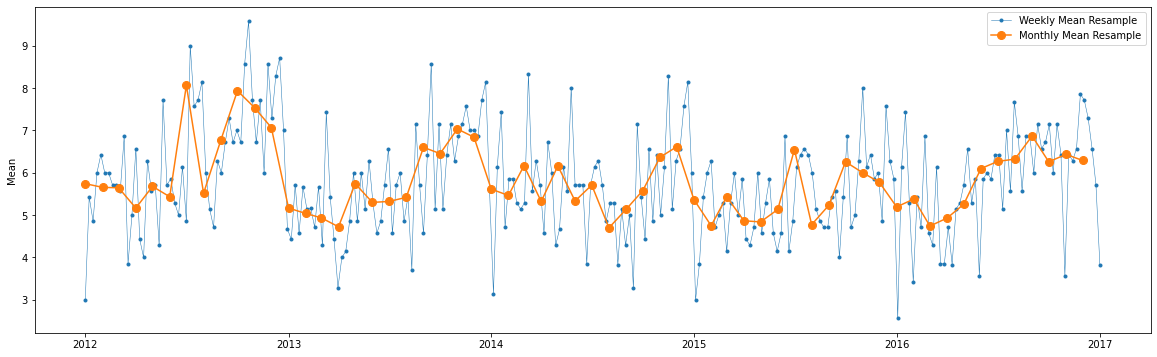

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(y_resample_w,marker='.', linestyle='-', linewidth=0.5, label='Weekly Mean Resample')
ax.plot(y_resample_m,marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Mean')
ax.legend()

- Nhìn vào biểu đồ ở trên, chúng ta chưa thấy có mô hình rõ ràng về sự thay đổi theo mùa, theo chu kỳ hoặc theo xu hướng

### Decompose the Data

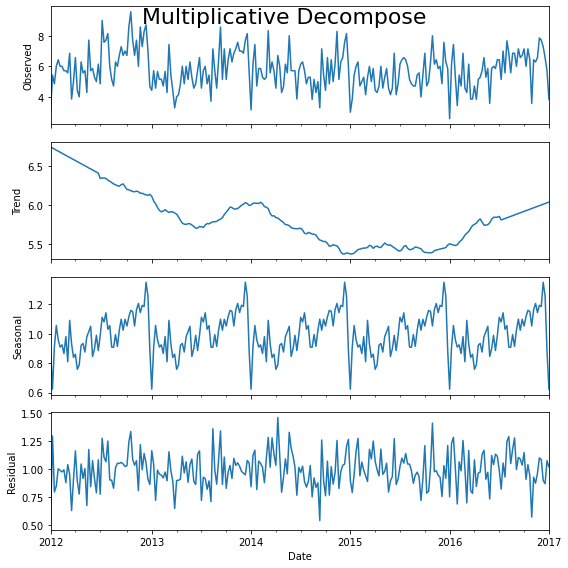

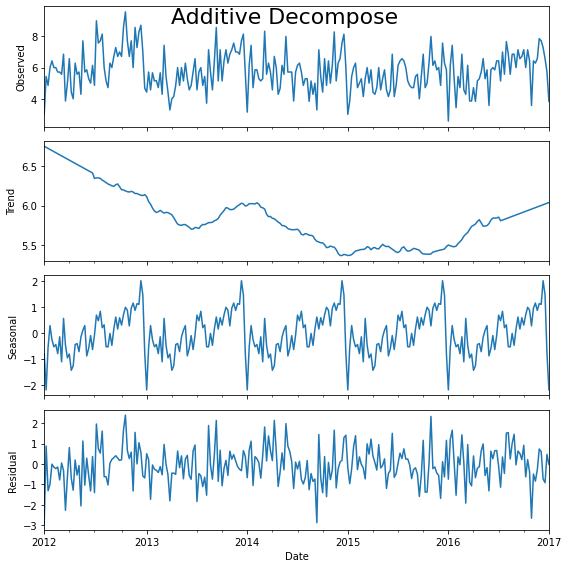

In [ ]:
from pylab import rcParams

# Multiplicative Decomposition
result_mul = seasonal_decompose(y_resample_w, model = 'multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(y_resample_w, model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,8)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

- Sau khi xem xét các biểu đồ phân tách, có thể thấy rằng tập dữ liệu không có trend cụ thể nhưng có tính thời vụ theo năm. 

### Autocorrelation and Partial autocorrelation

- Biểu đồ ACF cho thấy các mối tương quan tự động (autocorrelations) đo lường mối quan hệ giữa một quan sát và một quan sát trước đó.
- Biểu đô PACF: Về PACF cũng là chỉ số đo lường hệ số tương quan như ACF. Tuy nhiên vẫn có sự khác biệt đó là hệ số tương quan này loại bỏ ảnh hưởng của các chuỗi độ trễ trung gian.

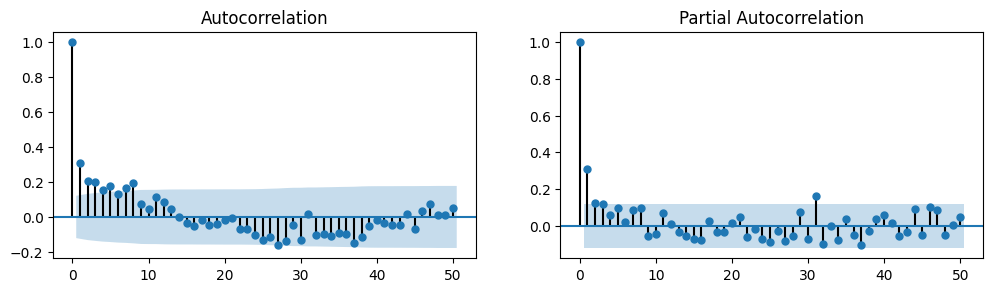

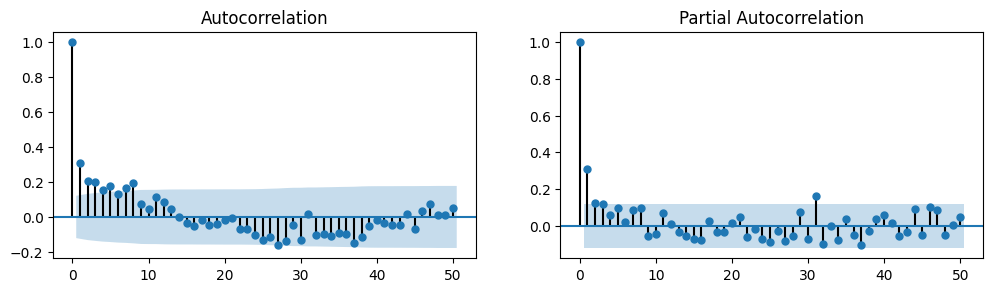

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(12,3), dpi =100)
plot_acf(y_resample_w, lags=50, ax=ax[0])
plot_pacf(y_resample_w, lags=50, ax=ax[1])

### Differencing

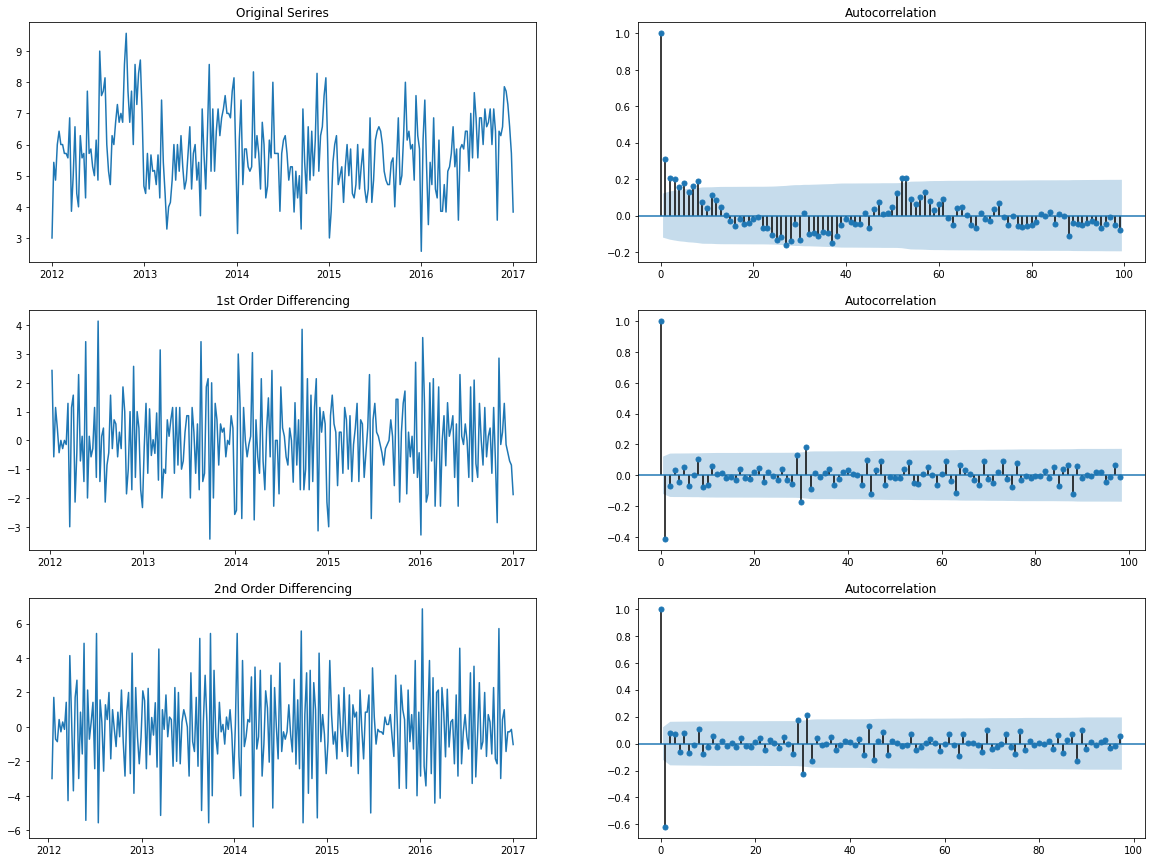

In [ ]:
df_count = y_resample_w
# Original Series
fig, axes = plt.subplots(3, 2, figsize = (20,15))
axes[0, 0].plot(df_count)
axes[0, 0].set_title('Original Serires')
plot_acf(df_count, ax=axes[0, 1], lags=99)

# 1st Differencing
axes[1, 0].plot(df_count.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_count.diff().dropna(), ax=axes[1, 1], lags=98)

# 2nd Differencing
axes[2, 0].plot(df_count.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_count.diff().diff().dropna(), ax=axes[2, 1],lags=97)

plt.show()

### Check for stationarity

#### A stationary time series
- Chuỗi thời gian tĩnh là một chuỗi có các đặc tính không phụ thuộc vào thời gian mà chuỗi thời gian được quan sát. Như vậy, chuỗi thời gian có xu hướng (trend) hoặc có tính thời vụ (seasonality) là không cố định (not stationary), xu hướng và tính thời vụ sẽ ảnh hưởng đến giá trị của chuỗi thời gian tại các thời điểm khác nhau.
- Tập dữ liệu là stationary nếu các thuộc tính thống kê của nó như mean, variance và autocorrelation không thay đổi theo thời gian.
- Ta phải đảm bảo tính stationary của time series trước khi áp dụng model

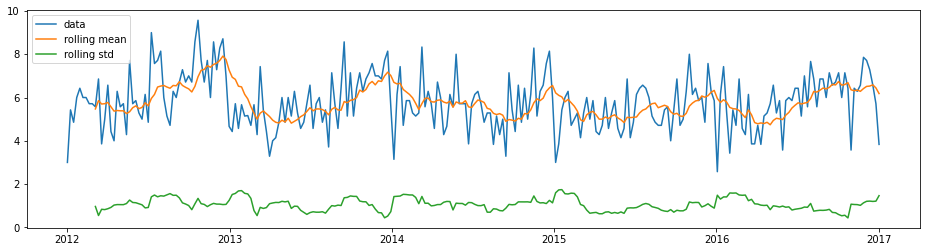

In [ ]:
# Determing rolling statistics
timeseries = y_resample_w
rolmean = pd.Series(timeseries).rolling(window=10).mean()
rolstd = pd.Series(timeseries).rolling(window=10).std()

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(timeseries, label= 'data')
ax.plot(rolmean, label='rolling mean')
ax.plot(rolstd, label='rolling std')
ax.legend()
pd.options.display.float_format = '{:.8f}'.format

- Nhìn vào biểu đồ, ta thấy mean và standard deviation không có sự thay đổi nhiều qua thời gian. Tuy nhiên để tăng mức độ tin cậy thì ta sẽ sử dụng thêm phương pháp ADF để kiểm tra tính dừng của tập dữ liệu

#### ADF approach

- ADF test (Augmented Dickey-Fuller Test) về cơ bản là một bài kiểm tra ý nghĩa thống kê so sánh p-value với các giá trị quan trọng và thực hiện kiểm tra giả thuyết. Thông qua phép thử này, chúng ta có thể xác định dữ liệu có stationary hay không với các mức độ tin cậy khác nhau.

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y_resample_w, autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values: ')
for k, v in dftest[4].items():
  print('{}: {} - The data is {} stationary with {}% confidence'.format(k,v,'not' if v < dftest[0] else '', 100-int(k[:-1])))

Test statistic = -6.562
P-value = 0.000
Critical values: 
1%: -3.4558530692911504 - The data is  stationary with 99% confidence
5%: -2.872764881778665 - The data is  stationary with 95% confidence
10%: -2.572751643088207 - The data is  stationary with 90% confidence


- Như vậy ta có thể kết luận tập dữ liệu có tính dừng

### Creating training and testing dataset

In [ ]:
import numpy as np 
train_set, test_set= np.split(y_resample_w, [int(.7 *len(y_resample_w))])

In [ ]:
test_set.shape

(79,)

In [ ]:
test_set

Date
2015-07-05   6.14285714
2015-07-12   6.42857143
2015-07-19   6.57142857
2015-07-26   6.42857143
2015-08-02   6.00000000
                ...    
2016-12-04   7.71428571
2016-12-11   7.28571429
2016-12-18   6.57142857
2016-12-25   5.71428571
2017-01-01   3.83333333
Freq: W-SUN, Name: Count, Length: 79, dtype: float64

### Train model using SARIMA

#### Meaning of model parameters 

- d = degree of first differencing involved - có thể được tính bằng số lần biến đổi cần thiết để làm cho chuỗi thời gian stationary
- p = order of AR part, được xác định thông qua biểu đồ ACF.
- q = order of the moving average (MA) part - được xác định thông qua biểu đồ PACF
- Khi xử lý dữ liệu có sử ảnh hưởng theo mùa, ta sử dụng Seasonal ARIMA, ký hiệu là ARIMA (p, d, q) (P, D, Q)s. Ở đây, (p, d, q) là các tham số không theo mùa (non-seansonal) đã mô tả ở trên, trong khi (P, D, Q) theo cùng một định nghĩa nhưng áp dụng cho thành phần theo mùa của chuỗi thời gian. s là chu kỳ của chuỗi thời gian (4 cho khoảng thời gian hàng quý, 12 cho khoảng thời gian hàng năm, v.v.).

#### Defining model parameters and training



- Để xác định giá trị của d, ta cần xác định time series có stationary không và biến đổi nó cho đến khi stationary
- Để tính toán giá trị của p và q, ta vẽ lần lượt biểu đồ ACF và biểu đồ PACF. Giá trị của p tương ứng với giá trị lags lớn nhất trên ACF graph nằm ngoài vùng tin cậy (vùng màu xanh). Quan sát biểu đồ ACF ở trên, ta chọn giá trị p = 1
- Tương tự, giá trị của q tương ứng với giá trị lags lớn nhất trên PACF graph nằm ngoài vùng tin cậy. Cụ thể ở đây q = 8
- Kiểm tra bằng ADF test bên trên, time series đã stationary mà không cần thêm bước biến đổi nào nên ta sẽ giữ d = 0 
- Source:

 https://towardsdatascience.com/how-to-model-a-time-series-through-a-sarima-model-e7587f85929c
https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459




- Bây giờ ta sẽ tạo ra tất cả kết hợp các tham số có thể có

In [ ]:
# warnings.filterwarnings("ignore") # specify to ignore warning messages

# orders = [(1, 0, 8), (1, 0, 0), (8, 0, 0), (0, 0, 8)]
# seasonal_pdq = [(1, 0, 5, 12), (0, 1, 5, 12), (5, 0, 5, 12), (5, 0, 1, 12)]
# for order in orders:
#   for param_seasonal in seasonal_pdq:
#       mod = sm.tsa.statespace.SARIMAX(y_resample_w,
#                                order=order,
#                                seasonal_order=param_seasonal,
#                                enforce_stationarity=False,
#                                enforce_invertibility=False)
#       results = mod.fit()
#       print('SARIMA({})x{} - AIC:{}'.format(order,param_seasonal, results.aic))

- Ta sẽ lựa chọn bộ tham số SARIMA(0,0,8)x(0, 1, 5, 12) cho ra giá trị AIC nhỏ nhất và tiến hành phân tích mô hình này cụ thể hơn

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y_resample_w,
                               order=(0,0,8),
                               seasonal_order=(0, 1, 5, 12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
print('AIC: ',results.aic)
print(results.summary().tables[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  600.2095063393137
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1899      0.085      2.240      0.025       0.024       0.356
ma.L2          0.0433      0.081      0.533      0.594      -0.116       0.202
ma.L3          0.1097      0.088      1.241      0.214      -0.064       0.283
ma.L4          0.0796      0.079      1.007      0.314      -0.075       0.235
ma.L5          0.1457      0.081      1.808      0.071      -0.012       0.304
ma.L6          0.0874      0.104      0.839      0.401      -0.117       0.292
ma.L7          0.0708      0.093      0.764      0.445      -0.111       0.253
ma.L8          0.1789      0.091      1.972      0.049       0.001       0.357
ma.S.L12      -0.9529     26.265     -0.036      0.971     -52.431      50.526
ma.S.L24       2.7337      1.577      1.734      0.083      -0.357       5.824
ma.S.L36      -3.0021     73

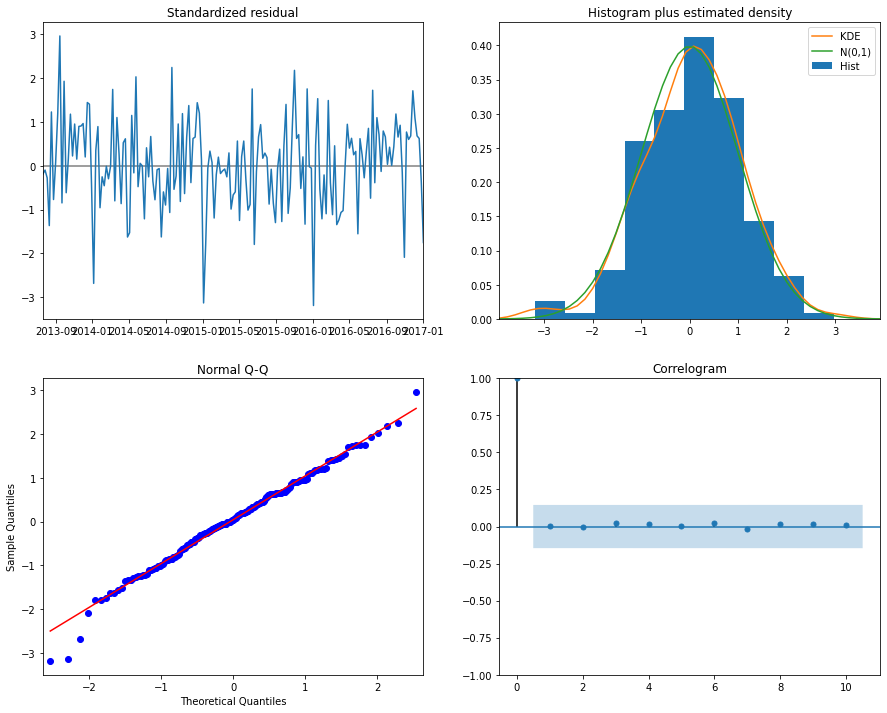

In [ ]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

- Trong biểu đồ trên cùng bên phải, chúng ta thấy rằng đường KDE màu đỏ theo khá sát với đường N(0,1) (trong đó N (0,1)) là phân phối chuẩn với mean là 0 và độ lệch chuẩn là 1) . Vậy residuals phân phối chuẩn
- Biểu đồ Q-Q ở góc dưới bên trái cho thấy đồ thị của phân phối lý thuyết và phân phối thực nghiệm nằm trên cùng một đường thẳng. Như vậy phần dư có phân phối chuẩn
- Phần dư được biểu diễn ở góc trên bên trái không cho thấy tính thời vụ rõ ràng nào -> nhiễu trắng 
- Biểu đồ tương quan cũng cho thấy mối tương quan thấp giữa các lags
-> Như vậy mô hình tìm được là phù hợp và có thế giúp chúng ta hiểu hơn về tập dữ liệu time series và đưa ra các giá trị dự đoán tương lai

#### Validate Forecasts

- Dự đoán một bước - dự báo tại mỗi thời điểm được tạo bằng cách sử dụng toàn bộ lịch sử cho đến thời điểm đó. Đặt dynamic = False

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-07-05'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Count,upper Count
Date,,
2015-07-05,3.16143680,7.62307367
2015-07-12,3.12712560,7.58867052
2015-07-19,4.14464375,8.60605367
2015-07-26,3.86810267,8.32879217
2015-08-02,3.55562170,8.01627532
...,...,...
2016-12-04,4.32782727,8.67655191
2016-12-11,4.35402530,8.70249182
2016-12-18,3.70488593,8.05334025


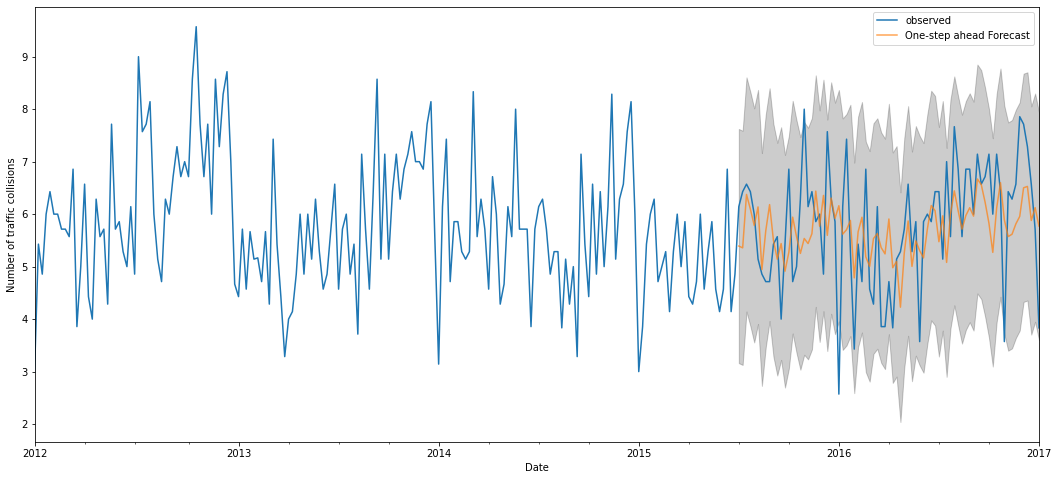

In [ ]:
ax = y_resample_w.plot(label='observed', figsize=(18,8))
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Number of traffic collisions')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean

# Compute the mean square error
mse= ((y_forecasted - test_set) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 1.2


- Sử dụng dynamic forecasts: sử dụng thông tin từ time series cho đến một thời điểm nhất định, sau đó dự báo bằng cách sử dụng các giá trị từ các mốc thời gian đã dự báo trước đó

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-07-05'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

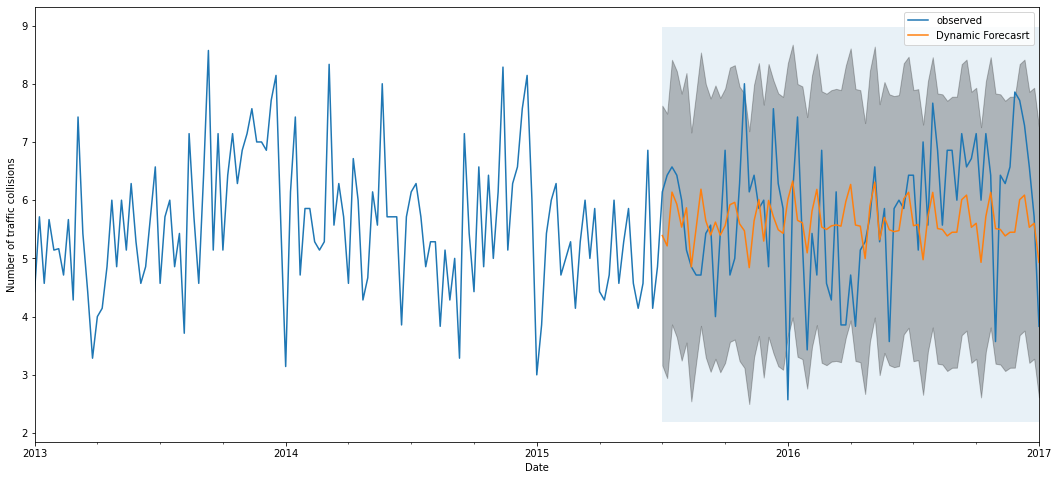

In [ ]:
ax = y_resample_w['2013':].plot(label='observed', figsize=(18,8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecasrt', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1],
                color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-07-05'), y_resample_w.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of traffic collisions')

plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean

# Compute the mean square error
mse = ((y_forecasted - test_set) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'. format(round(mse,2)))

The Mean Squared Error of our forecasts is 1.41


#### Producting and Visualizing Forecasts


In [ ]:
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()

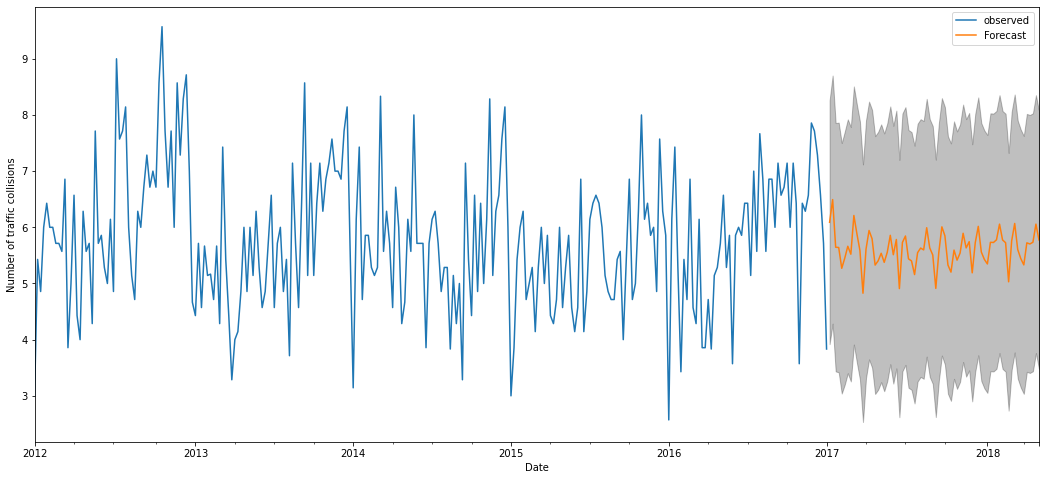

In [ ]:
ax = y_resample_w.plot(label='observed', figsize=(18,8))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Number of traffic collisions')

plt.legend()
plt.show()

## Khoảng thời gian nào trong tuần xảy ra tai nạn nhiều nhất?

Dùng biểu đồ tròn để trực quan tỉ lệ tai nạn trong tuần.

In [ ]:
def draw_pie(s,df):
    temp=value_ratios(df[s])
    temp_df=pd.DataFrame.from_dict(temp,orient='index')
    # labels=list(df[s].unique())
    labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.pie(temp_df,labels=labels, autopct='%.1f%%')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


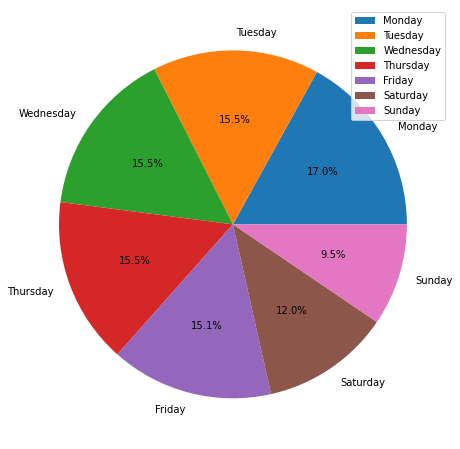

In [ ]:
fig = plt.figure(figsize=(16,8)) 

draw_pie('Day.1',data)

Nhận xét:
*  Nhìn chung không có nhiều sự chênh lệch về tỉ lệ tai nạn giữa các 
ngày trong tuần.
*  Có sự giảm dần tỉ lệ từ thứ 2 đến CN.
* Ngày có tỉ lệ cao nhất là Thứ 2, thấp nhất là CN.

## Khoảng thời gian nào (theo giờ) trong tuần xảy ra tai nạn nhiều nhất?

In [ ]:
def value_counts_(c):
    return dict(c.value_counts())
def value_counts_2(c):
    return c.value_counts()    

In [ ]:
df5=data[['Day.1','Time']]
hours = pd.to_datetime(df5['Time'], format='%H:%M:%S').dt.hour
df5['Time']=hours
df5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Day.1,Time
0,Tuesday,11
1,Tuesday,12
2,Tuesday,13
3,Friday,0
4,Tuesday,17


In [ ]:
df5_2=(df5[df5['Day.1']=="Monday"].groupby("Time").agg(value_counts_2)).rename(columns={"Day.1":"Monday"})
for i in ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']: 
    df5_2[i]= ((df5[df5['Day.1']==i].groupby("Time").agg(value_counts_2)).rename(columns={"Day.1":i}))[i]
df5_2

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
0,12,15,9,14,13,22,23
1,10,4,4,9,14,17,26
2,7,9,5,8,12,22,16
3,6,5,2,5,3,12,32
4,2,1,3,11,7,13,10
5,18,18,17,14,15,14,15
6,30,43,41,40,42,21,16
7,120,99,104,96,79,37,26
8,173,181,189,168,162,43,23


**Dùng heatmap để trực quan số vụ tai nạn theo ngày và giờ trong tuần**

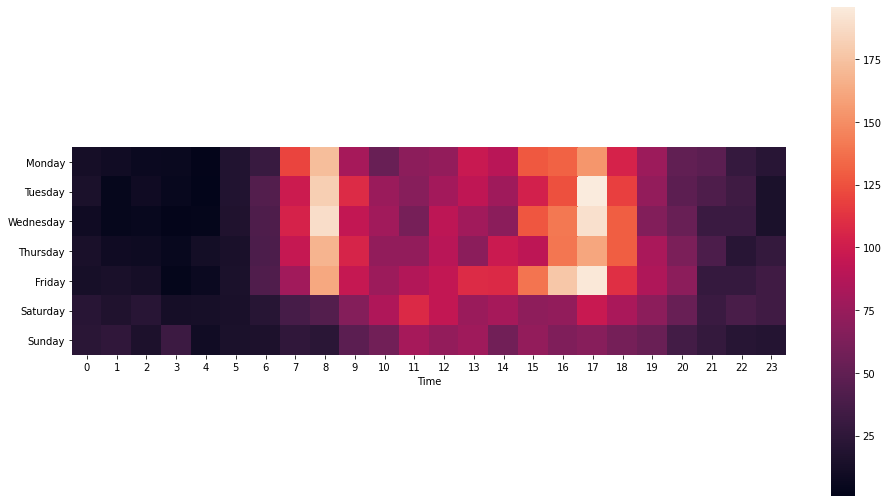

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df5_2.T,square=True, cbar=True)

**Nhận xét:**
* Khoảng từ 7-19h: một lượng lớn tai nạn xảy ra ở khung giờ này.
* Thứ 7, CN: số tại nạn thấp hơn các ngày còn lại.
* 8h và 16-17h: đây là khung giờ cao điểm giao thông, điều này lý giải cho việc tai nạn ở khung giờ này là cao nhất.

## Khoảng thời gian nào trong ngày xảy ra tai nạn nhiều nhất? Ban ngày hay ban đêm

In [ ]:

df9=data['Light'].agg(value_counts_2)
df9

Day     7766
Dark    2761
Name: Light, dtype: int64

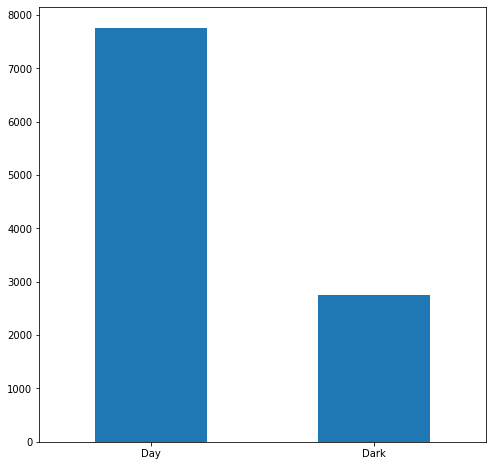

In [ ]:
df9.plot.bar( y='', rot=0)

Số vụ tai nạn vào ban ngày nhiều gấp 3 lần ban đêm

## Loại hình tai nạn giao thông phổ biến gây tổn thất nặng nề nhấtới

###Khám phá các mức độ nghiêm trọng của các loại hình tai nạn giao thông

In [ ]:
data["Severity"].value_counts()

Slight     8805
Serious    1567
Fatal       155
Name: Severity, dtype: int64

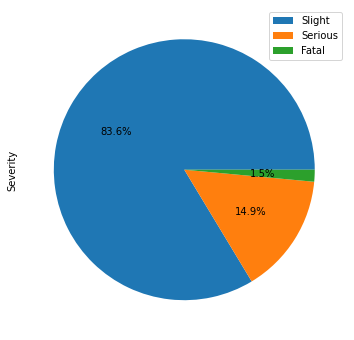

In [ ]:
data["Severity"].value_counts().plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%");

Ta thấy rằng có 3 mức độ nghiệm trọng: Slight(nhẹ), Serious(nặng), Fatal (gây tử vong)
-> Để xét loại hình tai nạn giao thông gây tổn thất nặng nề nhất, ta xét mức độ Fatal

**Với các vụ tai nạn gây tử vong**

In [ ]:
accident_fatal = data.loc[data["Severity"] == 'Fatal',:]

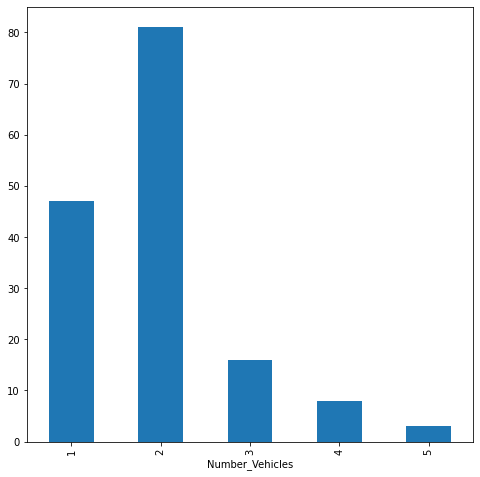

In [ ]:
accident_fatal.groupby('Number_Vehicles')["Severity"].count().plot.bar()

$\rightarrow$ Ở mức độ tai nạn gây chết người, thường có 2 phương tiện tham gia va chạm nhau

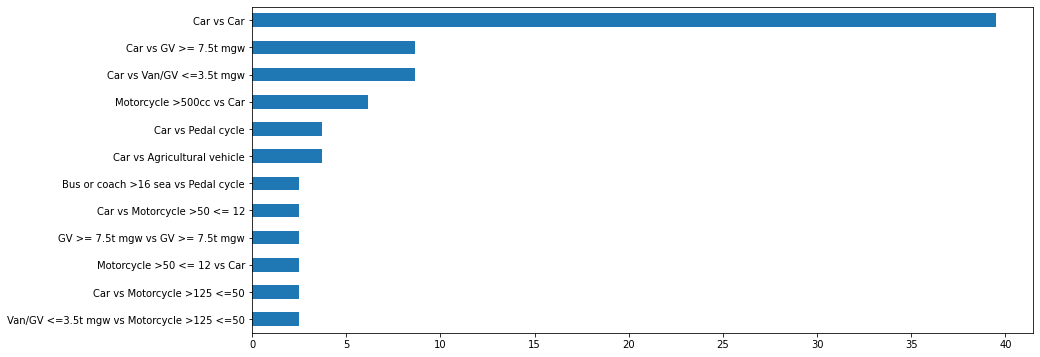

In [ ]:
vehicle_accident = accident_fatal.loc[accident_fatal['Number_Vehicles'] == 2]
two_vehicle_accident = vehicle_accident.Vehicle_1_Type + ' vs ' + vehicle_accident.Vehicle_2_Type
ax = two_vehicle_accident.value_counts(normalize = True)*100
ax_draw = ax.loc[ax > 2]
plt.figure(figsize= (14,6))
ax_draw.sort_values(ascending= True).plot.barh()

              (Vì thường có 2 phương tiện tham gia những tai nạn gây chết người, nên chúng ta chỉ xét trên 2 cột 'Vehicle_1_Type' và 'Vehicle_2_Type')

$\rightarrow$ Những vụ tai nạn gây tổn hại nặng nhất (gây chết người) thường do 2 xe ô tô va chạm với nhau.

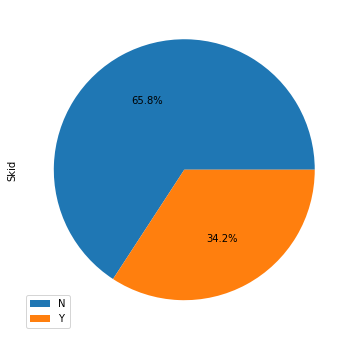

In [ ]:
accident_fatal.Skid.value_counts(normalize = True).plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%")

$\rightarrow $Khoảng $\frac{1}{3}$ vụ tai nạn gây chết người là do phương tiện bị trượt mất kiểm soát

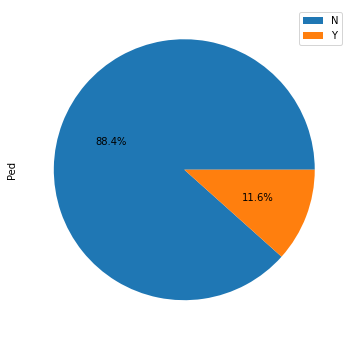

In [ ]:
accident_fatal.Ped.value_counts(normalize = True).plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%")

$\rightarrow$Trong những tai nạn nghiêm trọng gây chết người, có 11.6% nạn nhân là người đi bộ

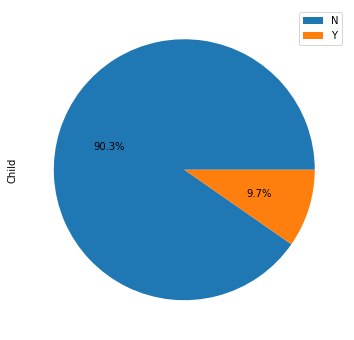

In [ ]:
accident_fatal.Child.value_counts(normalize = True).plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%")

$\rightarrow$ Trong số những nạn nhân đi bộ kể trên, có 9.7% là trẻ em

###**Tổng kết: Loại hình tai nạn giao thông phổ biến nào gây tổn thất nặng nề nhất?**


*Tai nạn gây tổn thất nặng nề nhất ở đây là **gây chết người** ("Fatal") và trong đó:*
1. Loại hình tai nạn xảy ra chủ yếu giữa 2 xe ô tô (car vs car) va chạm trực diện với nhau khi đều đang điều khiển phương tiện hướng về phía trước (going ahead).
2. Hơn 1/3 vụ tai nạn gây chết người là do phương tiện bị trượt dẫn đến mất kiểm soát (Skid: Y)

##Ở điều kiện thời tiết và đường xá như thế nào sẽ thường gây tai nạn?

Khám phá các cột:"Light"	"Weather" và "Surface"

1. **Weather**

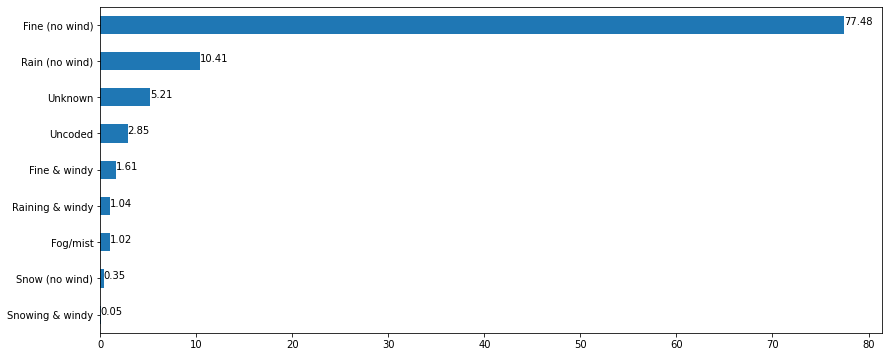

In [ ]:
weather_condition = (data['Weather'].value_counts(normalize = True)*100).round(2)
plt.figure(figsize= (14,6))
weather_condition.sort_values(ascending= True).plot.barh()
for index, value in enumerate(weather_condition.sort_values(ascending= True)):
    plt.text(value, index, str(value))

Từ Biểu đồ, chúng ta cần chú ý đến 2 điều kiện thời tiết: Fine(no wind), Rain(no wind) \
$\Rightarrow$ Phần lớn các vụ tai nạn xảy ra trong điều kiện thời kiện Tốt (không có gió), và khoảng 10% số vụ xảy ra trong điều kiện mưa.




 

2. Light

In [ ]:
weather_fine_rain_no_wind = data.loc[(data['Weather'] == 'Fine (no wind)') | (data['Weather'] == 'Rain (no wind)') ,:]

In [ ]:
weather_light = weather_fine_rain_no_wind['Light'] + ' and ' + weather_fine_rain_no_wind['Weather']


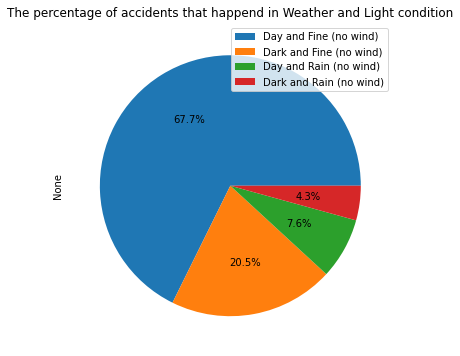

In [ ]:
plt.figure(figsize= (14,6))
(weather_light.value_counts(normalize =  True)*100).plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%")
plt.title('The percentage of accidents that happend in Weather and Light condition');

$\Rightarrow$ Chủ yếu các vụ tai nạn xảy ra ở điều kiện Thời tiết tốt (không gió và ban ngày) và khoảng 1/5 xảy ra trong điều kiện tối và thời tiết tốt

In [ ]:
weather_fine_rain_no_wind['weather_light'] = weather_light

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3. Surface

In [ ]:
Day_Dark_Fine = weather_fine_rain_no_wind.loc[(weather_fine_rain_no_wind['weather_light'] == 'Day and Fine (no wind)')|(weather_fine_rain_no_wind['weather_light'] == 'Dark and Fine (no wind)') ]

In [ ]:
weather_light_surface = Day_Dark_Fine['weather_light'] + " and " + Day_Dark_Fine['Surface']
weather_light_surface

1        Day and Fine (no wind) and Wet/damp
3            Dark and Fine (no wind) and Dry
6            Dark and Fine (no wind) and Dry
7             Day and Fine (no wind) and Dry
8            Dark and Fine (no wind) and Dry
                        ...                 
10520        Dark and Fine (no wind) and Dry
10521         Day and Fine (no wind) and Dry
10522         Day and Fine (no wind) and Dry
10523         Day and Fine (no wind) and Dry
10526         Day and Fine (no wind) and Dry
Length: 8156, dtype: object

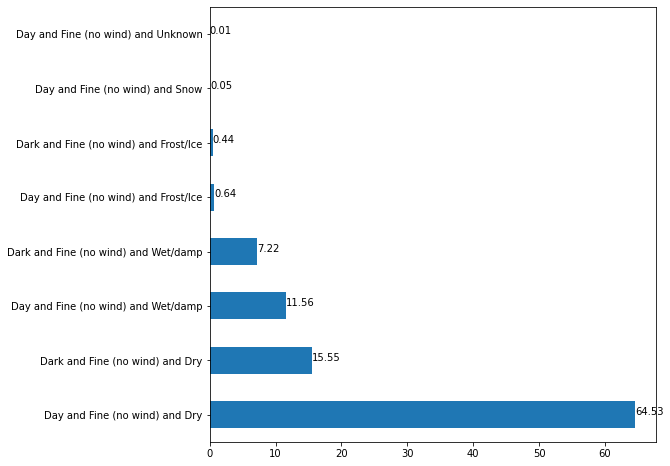

In [ ]:
(weather_light_surface.value_counts(normalize = True)*100).plot.barh()
for index, value in enumerate((weather_light_surface.value_counts(normalize = True)*100).round(2)):
    plt.text(value, index, str(value))

###**Kết luận**

Theo những phân tích bên trên:
- Phần lớn tai nạn giao thông xảy ra vào ban ngày, điều kiện thời tiết tốt và bề mặt đường khô
- Khoảng 11.6% số vụ tai nạn xảy ra vào ban ngày, điều kiện thời tiết tốt nhưng có mặt đường ướt.

Ở đây, ta thấy rằng khác với nhưng quan niệm thông thường của chúng ta như thời tiết khác nghiệt như mưa, trời tốt, mặt đường đóng băng, thì mới có nhiều vụ tai nạn xảy ra. Nhưng thực tế điều đó chỉ chiếm thiểu số. Trong điều kiện thời tiết và đường xá tốt mới là lúc xảy ra nhiều vụ tai nạn nhất.

$\rightarrow$ Vì vậy, bài học rút ra, thậm chí khi thời tiết, đường xá đẹp, thì chúng ta cũng phải điều khiển phương tiện giao thông một cách cẩn thận, chú ý quan sát xung quanh để tránh những tai nạn ngoài ý muốn có thể dẫn đến tử vong

## Những tuyến đường hay xảy ra tại nạn với xe chở hàng hóa

In [ ]:
gv_df= data.loc[(data["HGV"]=='Y') | (data["LGV"]=="Y")]
gv_df.sample(3)

,Reference,Year,Month,Day,Main_rd_no,Speed_limit,Pedestrian_1_Age,Number_Vehicles,Easting,Northing,Day.1,Time,Severity,Road_Class,Junction Detail,Light,Weather,Surface,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Location,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding,geometry
4001,3107013,2013,11,4,14,70,0,3,566203.71080000,266074.71620000,Monday,17:35:00,Slight,A,Not at junction,Dark,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A14 WESTBOUND 500M WEST OF A11 NEWMARKET,GV >= 7.5t mgw,Changing lane to left,E,W,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,E,W,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,E,W,"Not at,or within 20m of, junction",Did not skid,POINT (566203.711 266074.716)
5715,147214,2014,9,15,1307,60,0,3,553382.45940000,249385.04350000,Monday,08:25:00,Slight,A,'T'/staggered junctn,Day,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A1307 JUNCTION ABINGTON RD LITTLE ABINGTON,GV >= 7.5t mgw,Going ahead,Parked,Parked,Approaching jnctn or waiting/parked,Did not skid,Car,Slow or stopping,Parked,Parked,Approaching jnctn or waiting/parked,Did not skid,Car,Slow or stopping,Parked,Parked,Approaching jnctn or waiting/parked,Did not skid,POINT (553382.459 249385.043)
961,269812,2012,6,18,1049,60,0,1,547284.08240000,269838.23890000,Monday,09:25:00,Slight,B,Not at junction,Day,Fine (no wind),Dry,N,N,N,N,N,Y,N,Y,N,N,B1049 TWENTY PENCE RD COTTENHAM EXACT LOCATION UNKNOWN,Van/GV <=3.5t mgw,Ovrtking moving veh on offsde,S,N,"Not at,or within 20m of, junction",Skidded,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,POINT (547284.082 269838.239)


In [ ]:
crs={'init':'epsg:4326'}
gv_geometry=[Point(xy) for xy in zip(gv_df["Easting"], gv_df["Northing"])]
gv_geodata=gpd.GeoDataFrame(gv_df, crs=crs, geometry=gv_geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(509.9245888889201, 0.5, 'Northing')

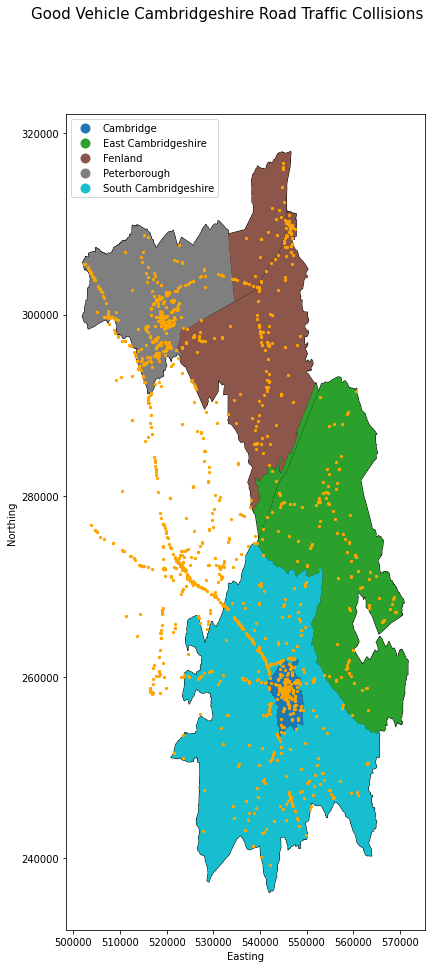

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
# cb_shapefile.plot()
cb_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=1,linewidth=1, cmap='cividis');
cb_shapefile.plot(column='lad14nm', ax=ax, legend=True);

gv_geodata.plot(ax=ax,color='orange', markersize=5);
fig.suptitle('Good Vehicle Cambridgeshire Road Traffic Collisions', fontsize =15)
ax.set_xlabel('Easting', fontsize = 10)
ax.set_ylabel('Northing', fontsize= 10)

- Ta nhận thấy tai nạn liên quan đến xe chở hàng hóa hạng nặng tập trung tại khu Cambridge, phía nam Peterborough và đông bắc Fenland
- Ngoài ra, ra nhận thấy có một chuỗi các tai nạn liên tiếp tạo thành các đường trên bản đồ. Đây có thể là các tuyến đường quan trọng giữa các trung tâm công nghiệp ở Cambridgeshire

In [ ]:
road_gv_df= gv_df[["Main_rd_no", "Road_Class", "Location"]]

In [ ]:
main_rd_no = road_gv_df["Main_rd_no"].value_counts()
minor_rd = [element for element in main_rd_no.keys() if main_rd_no[element] < 20]  
road_gv_df["new_main_rd_no"] = road_gv_df["Main_rd_no"].copy()

for other in minor_rd:
    road_gv_df.loc[road_gv_df["new_main_rd_no"] == other, "new_main_rd_no"] = 'other' 
    
road_gv_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Main_rd_no,Road_Class,Location,new_main_rd_no
1,505,A,A505 50M EAST OF M11 AT LAYBY,other
14,47,A,A47 EYE RD JUNCTION A16 CROWLAND BYPASS PETERBOROUGH,47
33,1303,A,NEWMARKET RD OUTSIDE MARSHALLS AIRPORT CAMBRIDGE,other
39,1123,A,A1123 HILL ROW CAUSEWAY JUNCTION B1381 SHELFORDS RD EARITH,other
43,10,A,A10 CAMBRIDGE RD JUNCTION LAZY OTTER TURN OFF,10
...,...,...,...,...
10471,1,A,STIRTLOE SOUTHBOUND A1 500 METRES SOUTH OF JUNCTION WITH BUC,1
10473,11,M,M11 NORTHBOUND 50 METRES SOUTH OF JUNCTION 12,11
10482,1139,A,JUNCTION 3 ORTON MALBOURNE FLETTON PARKWAY A1139,1139
10503,142,A,MEPAL ROAD APPROX 300M SW FROM SUTTON ROAD JUNCTION A142,142


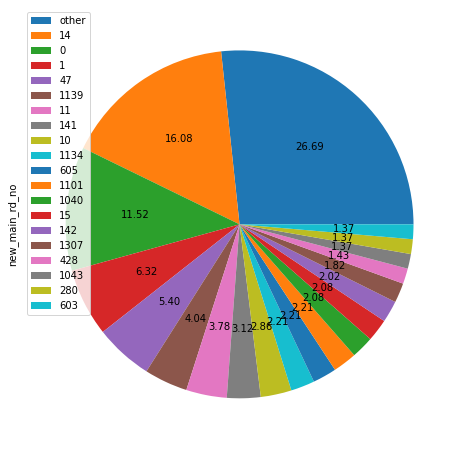

In [ ]:
road_gv_df["new_main_rd_no"].value_counts().plot(kind='pie', autopct="%.2f", labels=None, legend='auto')

Ta nhận thấy tai nạn liên quan đến xe chở hàng thường xảy ra ở đường số 14, 0, 1 và 47 $\rightarrow$ cần cẩn thận khi di chuyển qua những tuyến đường chính này